<a href="https://colab.research.google.com/github/dass2001ad/Cognifyz_data_science_Internship/blob/main/level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

***Predictive Modeling***

**Building a regression model to predict the aggregate rating of a restaurant based on available features.**

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [187]:
data = pd.read_csv('/content/sample_data/Dataset .csv')


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [189]:
data = pd.get_dummies(data, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)
X = data[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']]
y = data['Aggregate rating']

**Spliting the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.**

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression would be :")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Linear Regression would be :
Mean Squared Error (MSE): 1.6764802747031442
R-squared (R2) Score: 0.2634446409021949


**Experimenting with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.**

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [192]:
X = data[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']]
y = data['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.4f}, R-squared: {metrics['R-squared']:.4f}")

Linear Regression - Mean Squared Error: 1.6765, R-squared: 0.2634
Decision Tree - Mean Squared Error: 0.2035, R-squared: 0.9106
Random Forest - Mean Squared Error: 0.1339, R-squared: 0.9412


# **Task 2**

***Customer Preference Analysis***

**Analyzing the relationship between the type of cuisine and the restaurant's rating.**

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [194]:
c = data['Cuisines']
c.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [195]:
top_10_cuisines = c.value_counts().head(10).index
cuisine_ratings = pd.DataFrame({'Cuisine': c, 'Rating': data['Aggregate rating']})
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings['Cuisine'].isin(top_10_cuisines)]

<ipython-input-196-8e286578ae8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine', y='Rating', data=cuisine_ratings_top_10, palette='viridis')


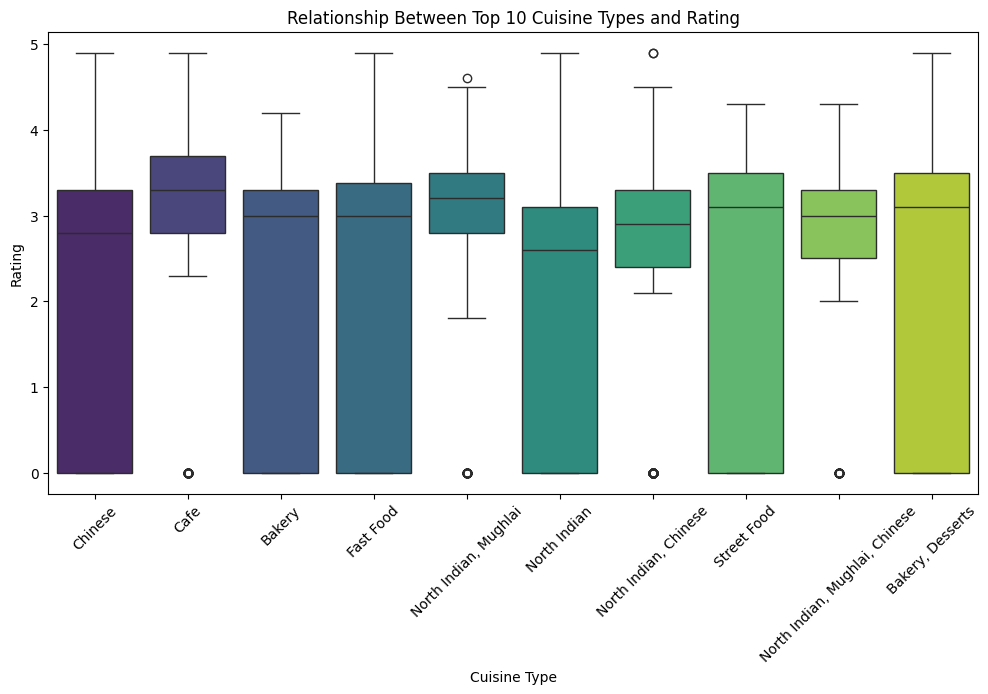

In [196]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Rating', data=cuisine_ratings_top_10, palette='viridis')
plt.title('Relationship Between Top 10 Cuisine Types and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Identifying the most popular cuisines among customers based on the number of votes.**

In [197]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().reset_index()
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)
print("Top 10 Most Popular Cuisines Based on Number of Votes:")
cuisine_votes.head(10)

Top 10 Most Popular Cuisines Based on Number of Votes:


,Cuisines,Votes
1514,"North Indian, Mughlai",53747
1306,North Indian,46241
1329,"North Indian, Chinese",42012
331,Cafe,30657
497,Chinese,21925
1520,"North Indian, Mughlai, Chinese",20115
828,Fast Food,17852
1699,South Indian,16433
1288,"Mughlai, North Indian",15275
1031,Italian,14799


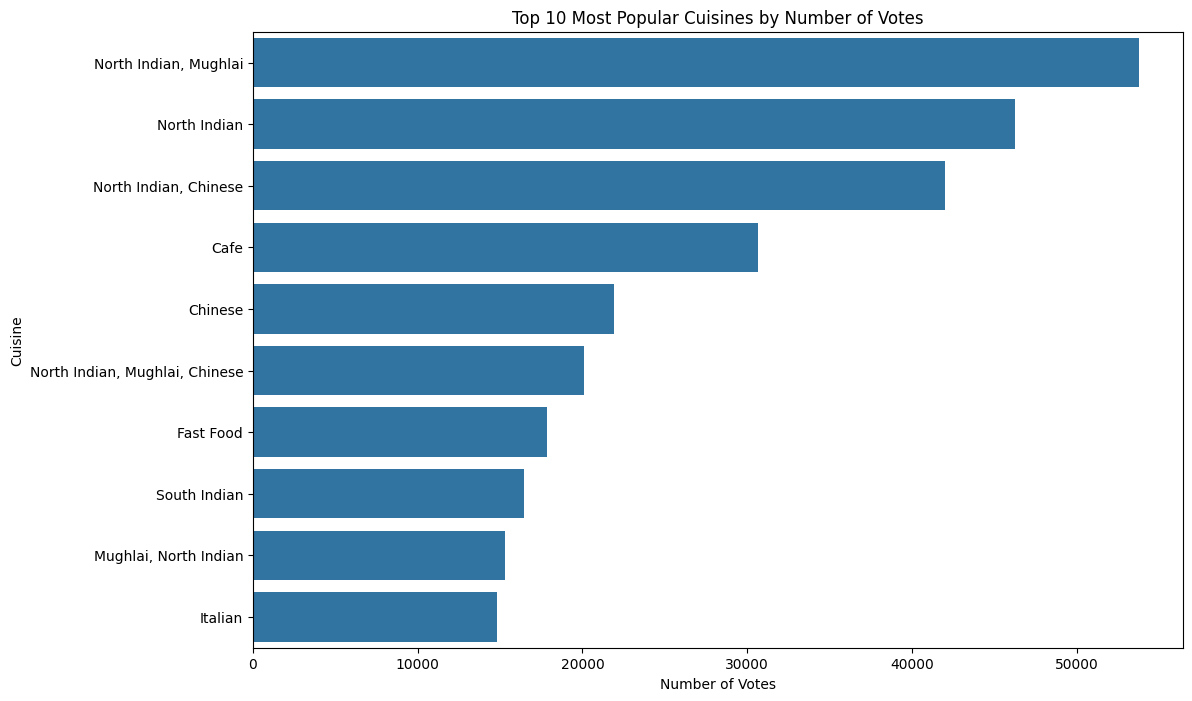

In [198]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes.head(10))
plt.title('Top 10 Most Popular Cuisines by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine')
plt.show()

**Determining if there are any specific cuisines that tend to receive higher ratings.**

In [199]:
cuisine_ratings = pd.DataFrame({'Cuisine': c, 'Rating': data['Aggregate rating']})
# Calculate the average rating for each cuisine
average_rating_by_cuisine = cuisine_ratings.groupby('Cuisine')['Rating'].mean()
# Sort cuisines based on the average rating in descending order
sorted_cuisines_by_rating = average_rating_by_cuisine.sort_values(ascending=False)
# Display the top 10 cuisines with the highest average ratings
print("Top 10 Cuisines with the Highest Average Ratings:")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with the Highest Average Ratings:
Cuisine
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Rating, dtype: float64


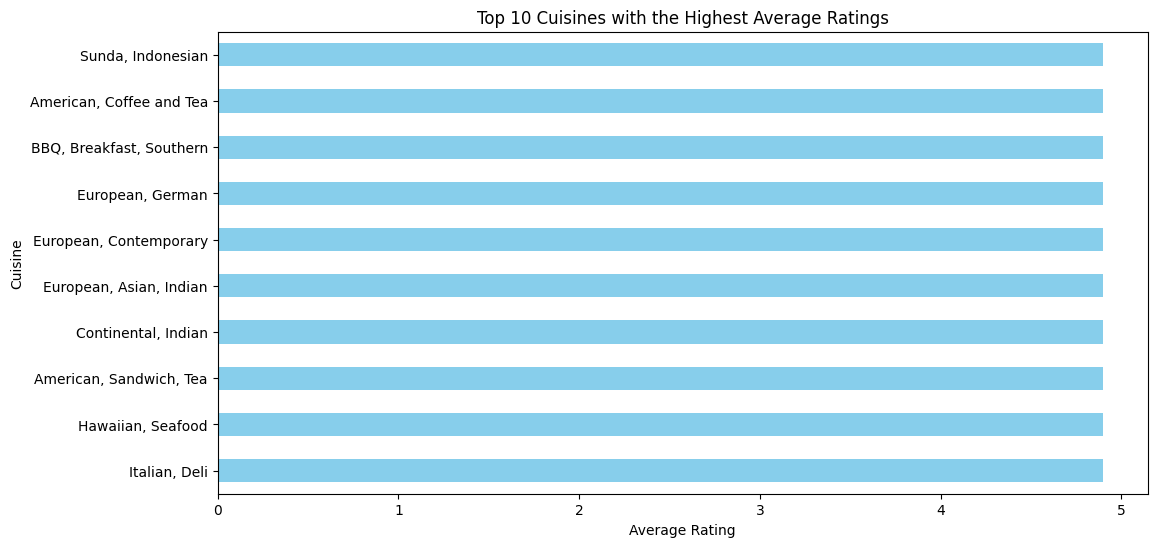

In [200]:
plt.figure(figsize=(12, 6))
sorted_cuisines_by_rating.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# **Task 3**

***Data Visualization***

**Creating visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).**

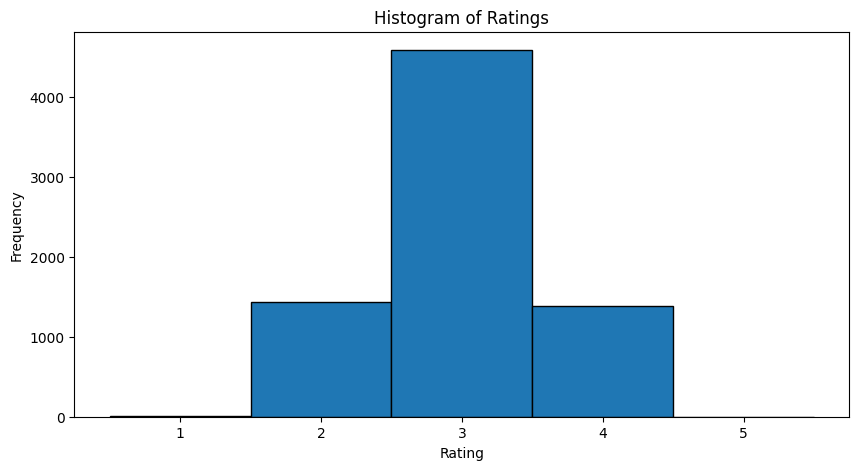

In [201]:
plt.figure(figsize=(10, 5))
plt.hist(data['Aggregate rating'], bins=range(1, 7), align='left', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.xticks(range(1, 6))
plt.show()

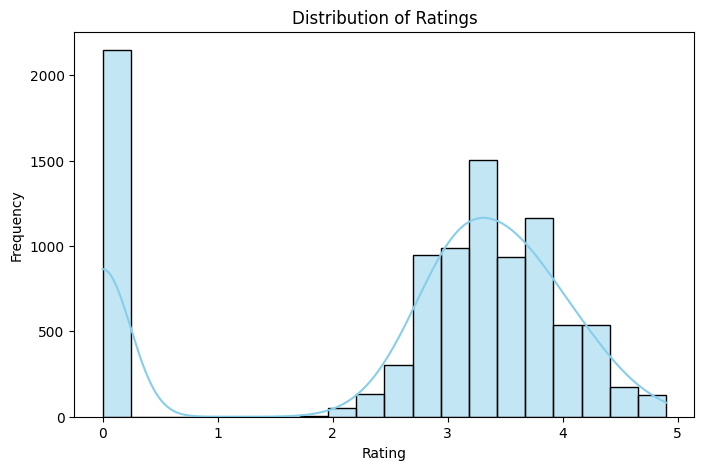

In [202]:
# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-203-74342f3d9533>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data='Aggregate rating', palette='viridis')


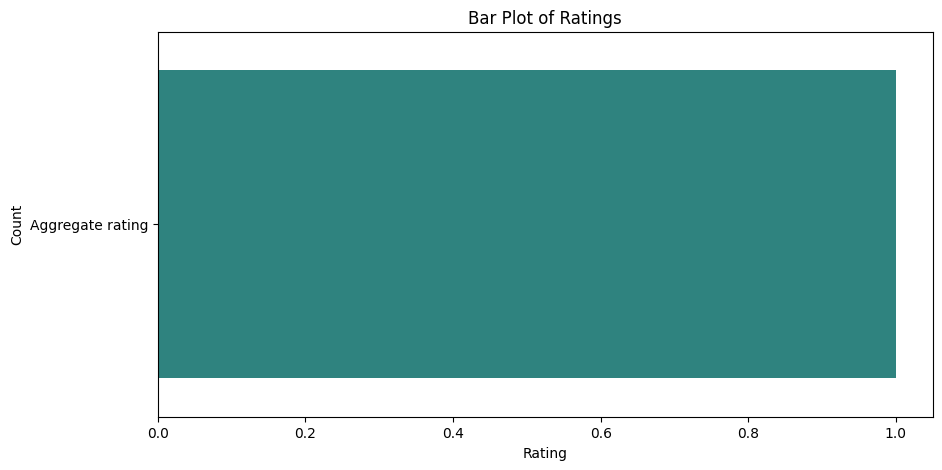

In [203]:
plt.figure(figsize=(10, 5))
sns.countplot(data='Aggregate rating', palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar Plot of Ratings')
plt.show()

<ipython-input-204-ad631bd0a8ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=data, palette='cividis')


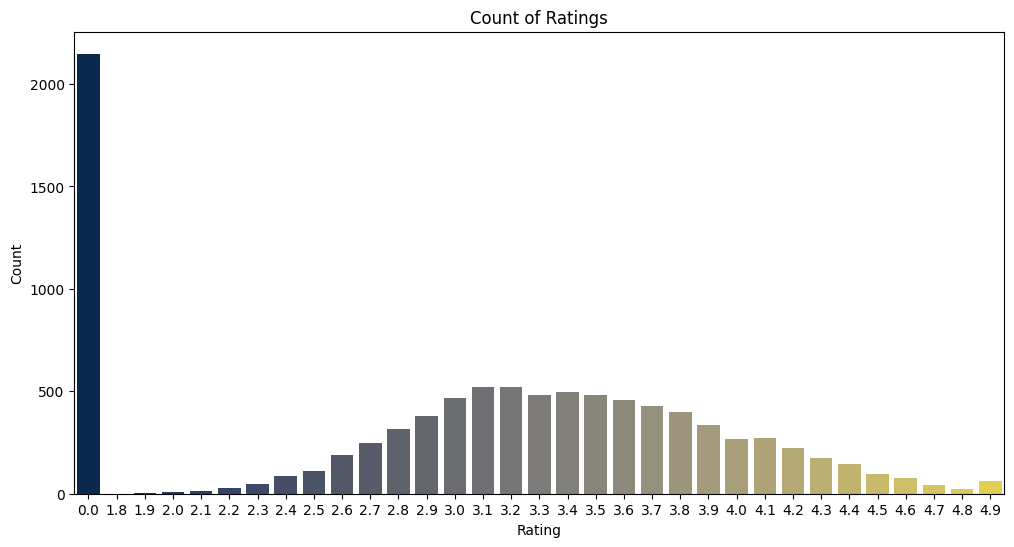

In [204]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=data, palette='cividis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-205-4ad157a52281>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aggregate rating', data=data, palette='viridis')


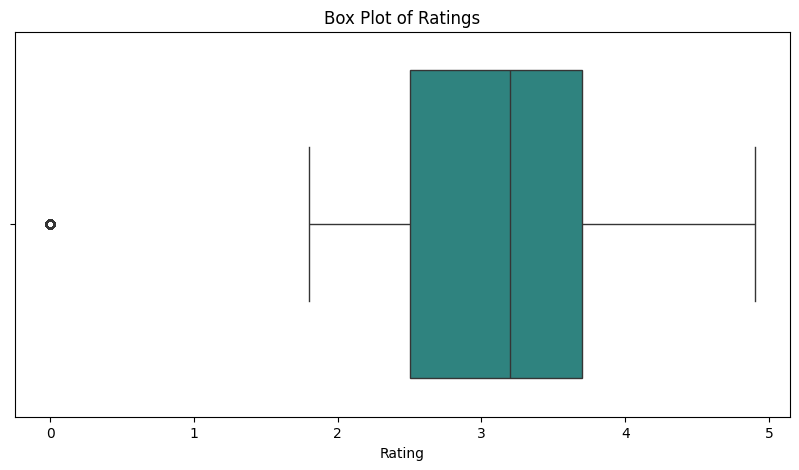

In [205]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Aggregate rating', data=data, palette='viridis')
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

<ipython-input-206-60ab44d65f8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Aggregate rating', data=data, palette='viridis')


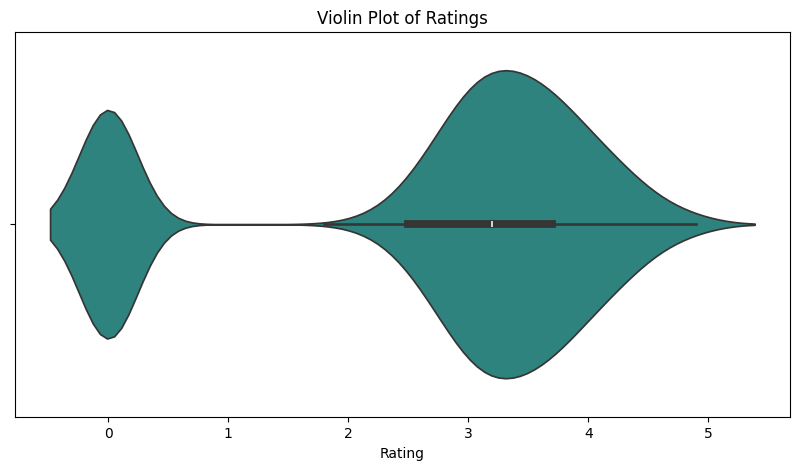

In [206]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Aggregate rating', data=data, palette='viridis')
plt.xlabel('Rating')
plt.title('Violin Plot of Ratings')
plt.show()

**Comparing the average ratings of different cuisines or cities using appropriate visualizations.**

In [207]:
avg_rating_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

In [208]:
avg_rating_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

<ipython-input-209-6a7f0e2ba429>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')


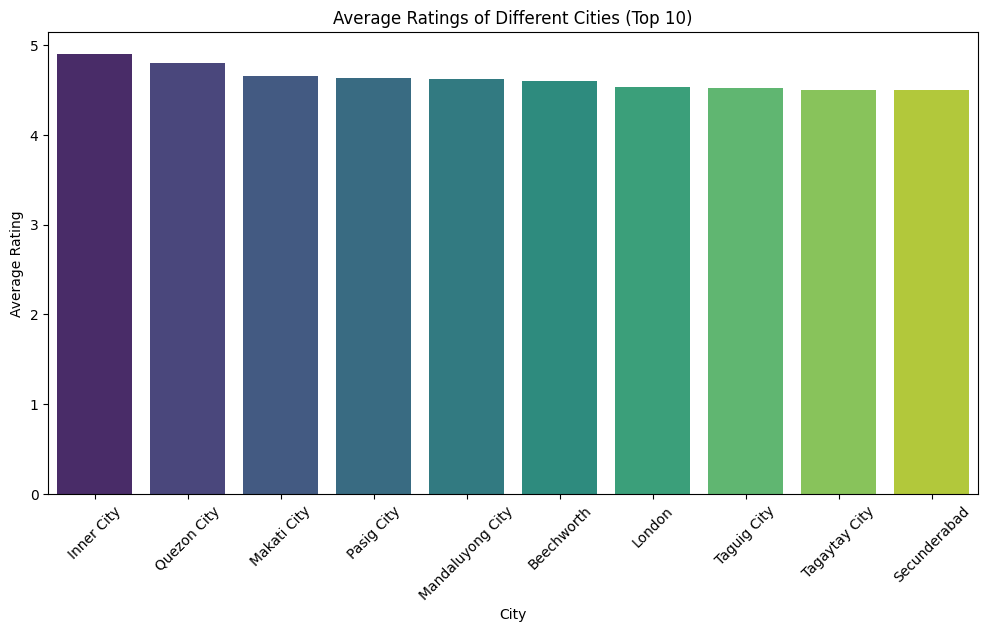

In [209]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_city.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')
plt.title('Average Ratings of Different Cities (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-210-25a3b759f323>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')


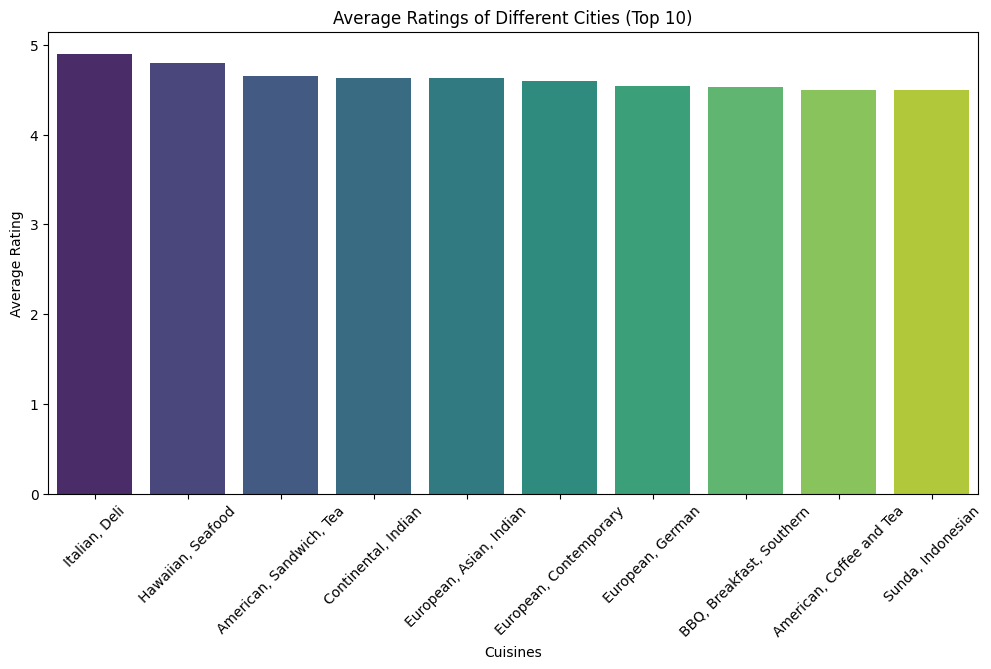

In [210]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cuisine.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')
plt.title('Average Ratings of Different Cities (Top 10)')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Visualizing the relationship between various features and the target variable to gain insights.**

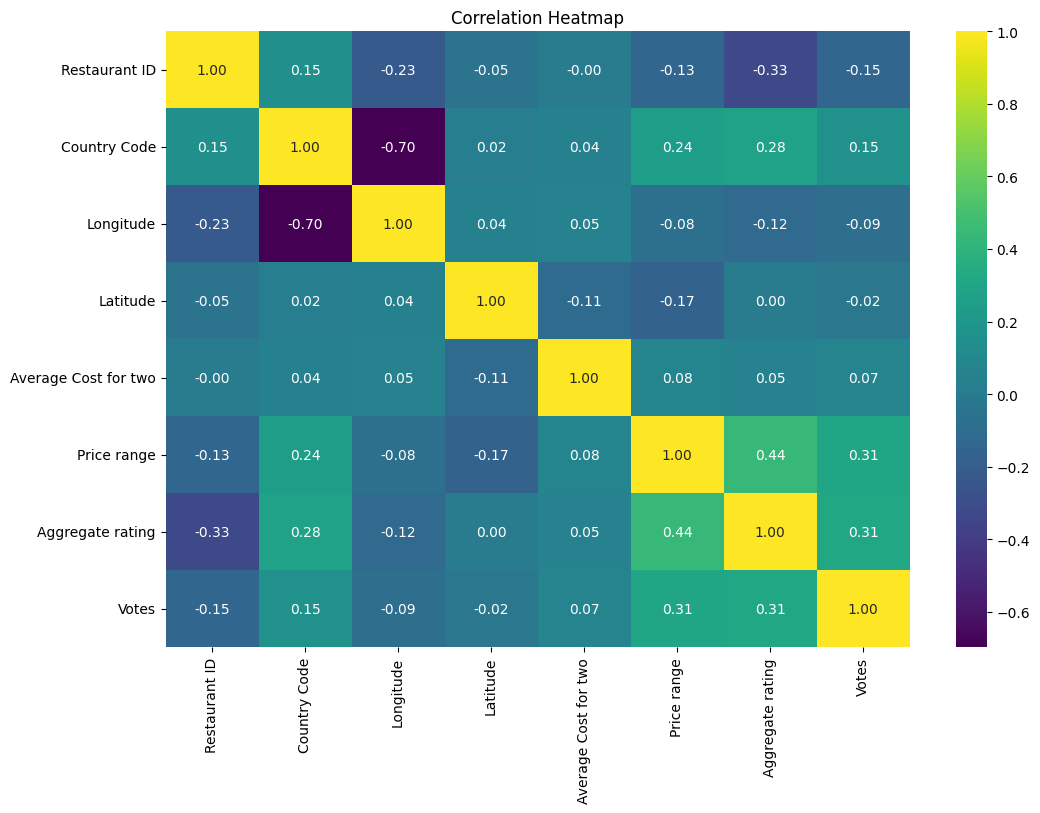

In [211]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

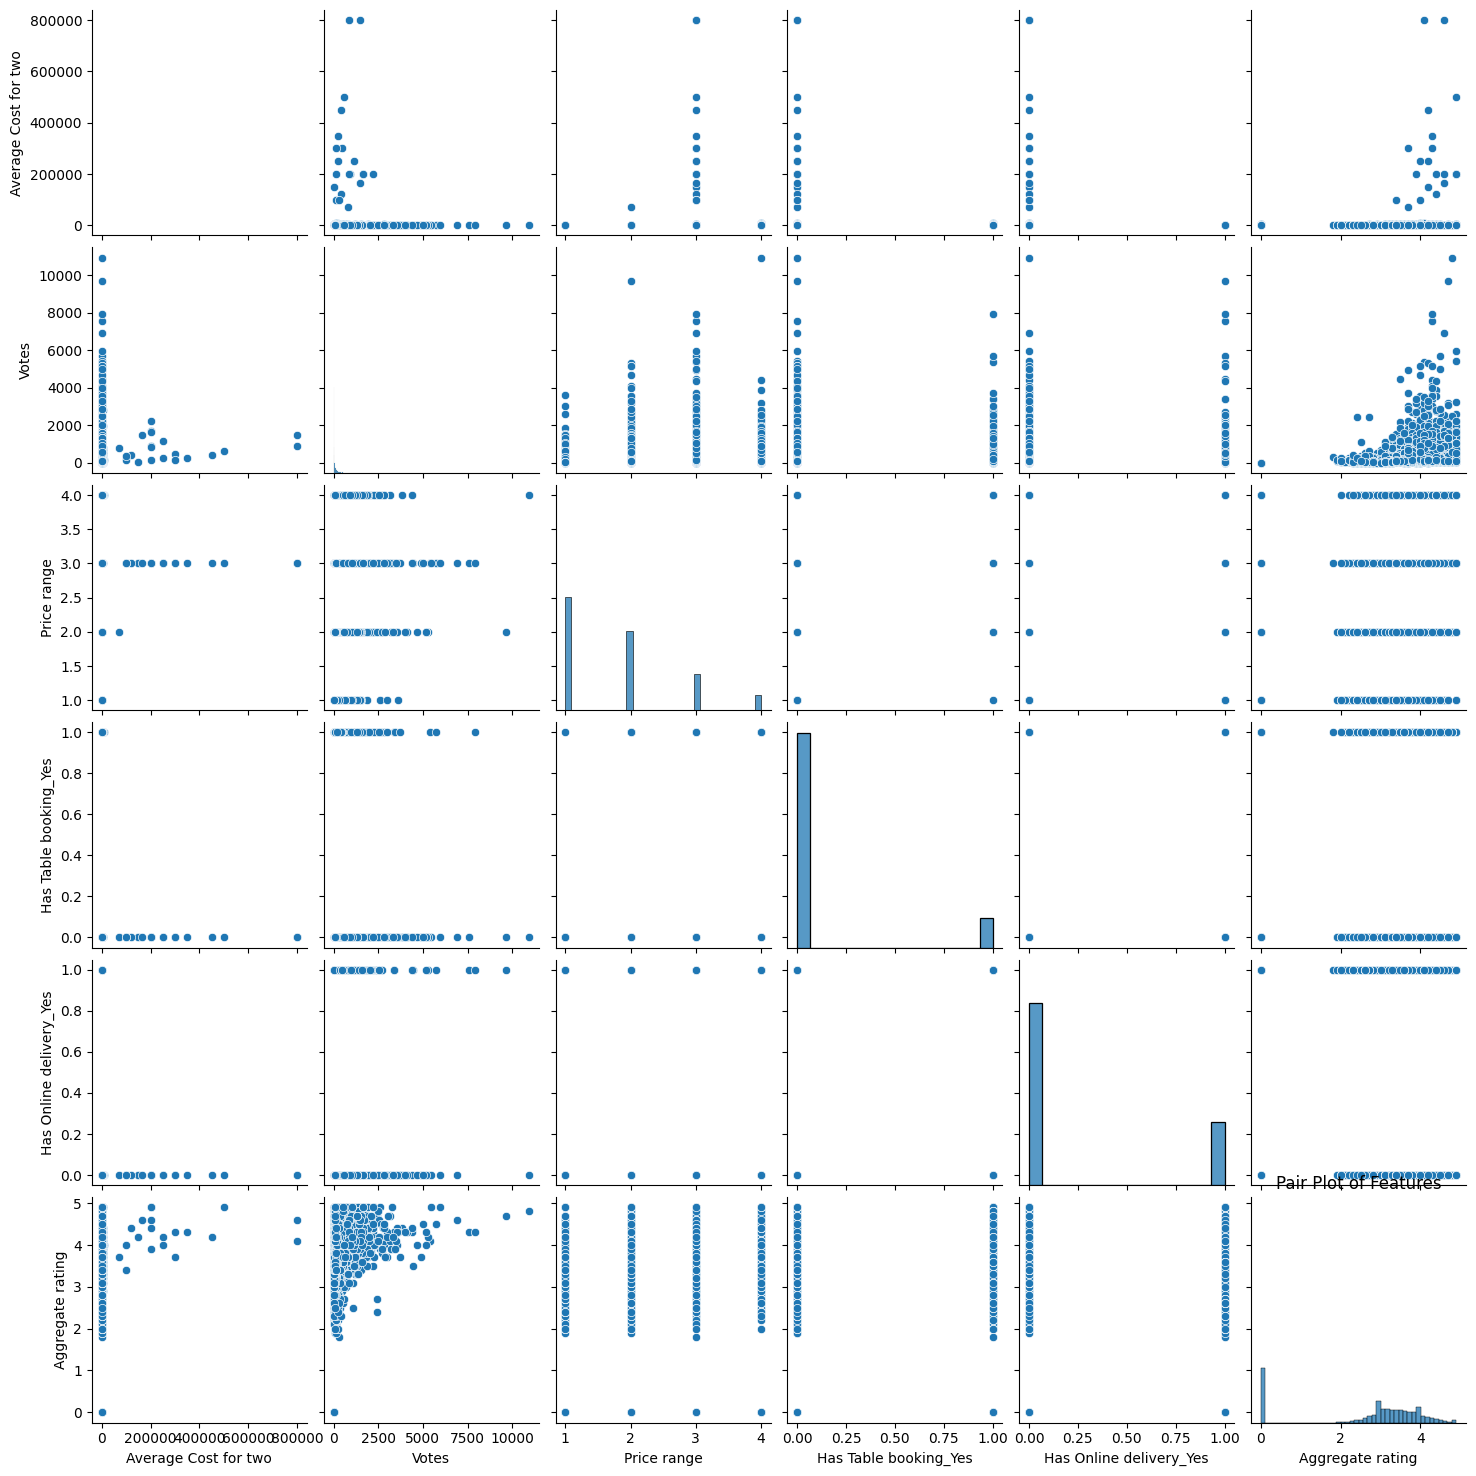

In [212]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes', 'Aggregate rating']
sns.pairplot(data[features])
plt.title('Pair Plot of Features')
plt.show()